In [1]:
import struct
import numpy as np

In [2]:
def load_data(images,labels):
    with open(labels,'rb') as labelsPath:
        magic,n = struct.unpack('>II',labelsPath.read(8))
        labels = np.fromfile(labelsPath,dtype=np.uint8)
    with open(images,'rb') as imagesPath:
        magic,num,rows,cols = struct.unpack('>IIII',imagesPath.read(16))
        images = np.fromfile(imagesPath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

In [3]:
train_images,train_labels = load_data('/home/rg/Documents/AI/Specialization/train-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/train-labels-idx1-ubyte')

In [4]:
train_images.shape

(60000, 784)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images,test_labels = load_data('/home/rg/Documents/AI/Specialization/t10k-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/t10k-labels-idx1-ubyte')

In [7]:
test_images.shape

(10000, 784)

In [8]:
test_labels.shape

(10000,)

<h3>Steps to apply PCA:
<ol>
    <li>Standardize the data</li>
    <li>Compute the covariance matrix</li>
    <li>Solve for eigen values of the covariance matrix</li>
    <li>Figure out the top-N principal components</li>
</h3>
<h5>As our data contains images which are nothing but numpy array,first flatten the images and then standardize for each image </h5>

In [9]:
from matplotlib import pyplot as plt
# np.transpose(train_images[0]).shape
# Need to reshape the image before looking at it
temp = train_images[0].reshape(28,28) #(28,28) because 28*28 = 784.No,It cannot be otherwise

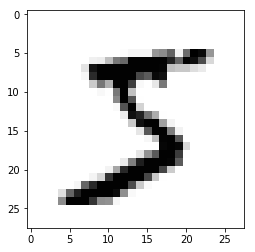

In [11]:
plt.imshow(temp,cmap="Greys") #Can also look at grey scale image with parameter cmap='Greys'
plt.show()

<h3>Step-1 is to standardize the data</h3>

In [12]:
train_temp = np.transpose(np.matrix(train_images))
train_images[0].shape

(784,)

<h3>Standardize the images</h3>

In [13]:
for i in range(len(train_temp)):
    mn,mx,std = np.min(train_temp[i]),np.max(train_temp[i]),np.std(train_temp[i])
#     print(i,"=",mn,mx,std)